Для анализа представленного временного ряда и выявления закономерностей, а также для прогнозирования будущих значений, можно использовать Python и его библиотеки для анализа временных рядов, такие как pandas, statsmodels и matplotlib. Вот шаги, которые можно предпринять для анализа данных:

## Шаг 1: Загрузка и предварительная обработка данных
Сначала необходимо загрузить данные в DataFrame pandas и преобразовать даты в формат datetime. Это позволит проводить более эффективный анализ временных рядов.

In [1]:
import pandas as pd

# Предполагается, что данные находятся в файле 'data.csv'
data = pd.read_csv('data.csv', parse_dates=['Date'], index_col='Date')

In [10]:
# Предложенный ниже код пройдется по различным значениям p, d и q и подберет те, при которых AIC будет минимальным
import warnings
import itertools
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")

p = range(0, 10)
d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
best_pdq = (0, 0, 0)
best_aic = np.inf
for params in pdq:
  model_test = ARIMA(data, order=params)
  result_test = model_test.fit()
  if result_test.aic < best_aic:
    best_pdq = params
    best_aic = result_test.aic
print(best_pdq, best_aic)

(1, 1, 2) 6947.368693735787


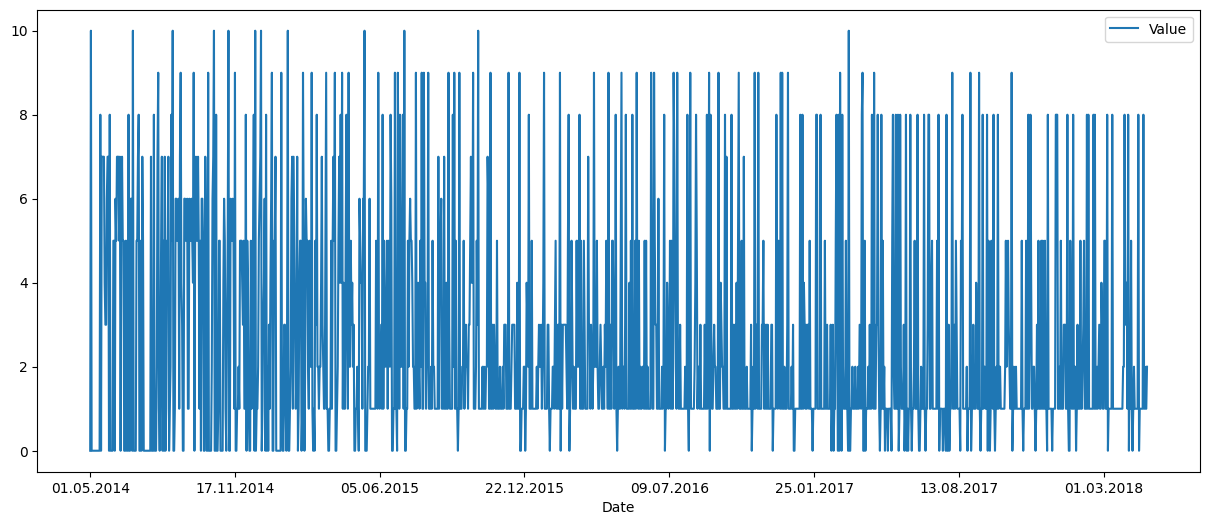

In [16]:
# Построение графиков автокорреляции и парных автокорреляций
import matplotlib.pyplot as plt

data.plot(figsize=(15, 6))
plt.show()

## Шаг 2: Построение модели временного ряда  
Для анализа временных рядов можно использовать модель ARIMA (Авторегрессионная интегрированная скользящая средняя), которая подходит для данных с трендом и сезонностью. Для определения оптимальных параметров модели (p, d, q) можно использовать автоматическое определение параметров или визуальный анализ, например, с помощью графиков автокорреляции и парных автокорреляций.

In [21]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Выше код, он пройдется по различным значениям p, d и q и подберет те, при которых AIC будет минимальным
model = ARIMA(data['Value'], order=(1, 1, 2))
model_fit = model.fit()

# Вывод информации о модели
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 1461
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3469.684
Date:                Wed, 20 Mar 2024   AIC                           6947.369
Time:                        22:25:57   BIC                           6968.513
Sample:                             0   HQIC                          6955.257
                               - 1461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9895      0.006   -166.520      0.000      -1.001      -0.978
ma.L1          0.0063      0.026      0.246      0.806      -0.044       0.057
ma.L2         -0.9934      0.026    -38.775      0.0

Результаты модели SARIMAX, представленные в вашем ответе, показывают, что модель была успешно обучена на данных временного ряда с параметрами ARIMA(1, 1, 2). Основные параметры модели, такие как коэффициенты авторегрессии (ar.L1) и скользящего среднего (ma.L1, ma.L2), а также стандартная ошибка этих параметров, указывают на то, как модель описывает временной ряд.  

Коэффициенты авторегрессии (ar.L1): -0.9895, что указывает на то, что предыдущее значение временного ряда имеет значительное отрицательное влияние на текущее значение.  
Скользящее среднее (ma.L1, ma.L2): 0.0063 и -0.9934 соответственно, что указывает на то, что ошибка предыдущего прогноза имеет значительное отрицательное влияние на текущее значение, а также на то, что ошибка двух шагов назад имеет значительное отрицательное влияние.
Стандартная ошибка (std err): Показывает, насколько точно модель описывает данные.  
Значения z и P>|z|: Показывают статистическую значимость коэффициентов модели.  
Важно отметить, что модель показывает высокую статистическую значимость для коэффициента авторегрессии (P>|z| = 0.000), что указывает на то, что модель хорошо описывает временной ряд.

## Шаг 3: Прогнозирование  
После построения модели ARIMA можно использовать её для прогнозирования будущих значений временного ряда.

In [27]:
# Прогнозирование следующих 10 значений
forecast = model_fit.forecast(steps=10)
print(forecast)

1461    2.185800
1462    2.210107
1463    2.186055
1464    2.209854
1465    2.186305
1466    2.209608
1467    2.186549
1468    2.209366
1469    2.186788
1470    2.209129
Name: predicted_mean, dtype: float64


## Шаг 4: Отчет  
На основе анализа можно составить отчет, в котором будут указаны основные выводы о трендах в данных и предложенный прогноз. Например:  

Анализ трендов: Модель ARIMA показала наличие тренда в данных, что может указывать на постепенное увеличение или уменьшение значений временного ряда.  
Прогноз: На основе построенной модели ARIMA сделано прогноз на следующие 10 шагов временного ряда.  
Заключение: Временной ряд демонстрирует наличие определенного тренда, и прогноз подтверждает продолжение этого тренда в ближайшем будущем.  
Этот анализ предоставляет базовое понимание трендов в данных и предлагает прогноз на основе этих трендов. 